<a href="https://colab.research.google.com/github/shubh70abhir/keras_journey/blob/main/lenet_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt

In [ ]:
from keras.datasets import cifar10


In [ ]:
(train_images,train_labels),(test_images,test_labels)=cifar10.load_data()

In [ ]:
print(train_images.shape)

(50000, 32, 32, 3)


In [7]:
train_labels.shape

(50000, 1)

In [8]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [9]:
train_labels = keras.utils.to_categorical(train_labels,10)
test_labels = keras.utils.to_categorical(test_labels,10)


In [10]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten,Dense,Dropout


In [13]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [15]:
model.fit(train_images,train_labels,
          epochs=5,
          batch_size=64)

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 85ms/step - accuracy: 0.2991 - loss: 1.8719
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 88ms/step - accuracy: 0.5484 - loss: 1.2644
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 67s 86ms/step - accuracy: 0.6179 - loss: 1.0777
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 76s 78ms/step - accuracy: 0.6660 - loss: 0.9505
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 78ms/step - accuracy: 0.6969 - loss: 0.8644


In [16]:
test_loss,test_acc = model.evaluate(test_images,test_labels)
print('test accuracy:',test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.6945 - loss: 0.8674
test accuracy: 0.6930999755859375


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,083,104 (4.13 MB)

 Trainable params: 361,034 (1.38 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 722,070 (2.75 MB)

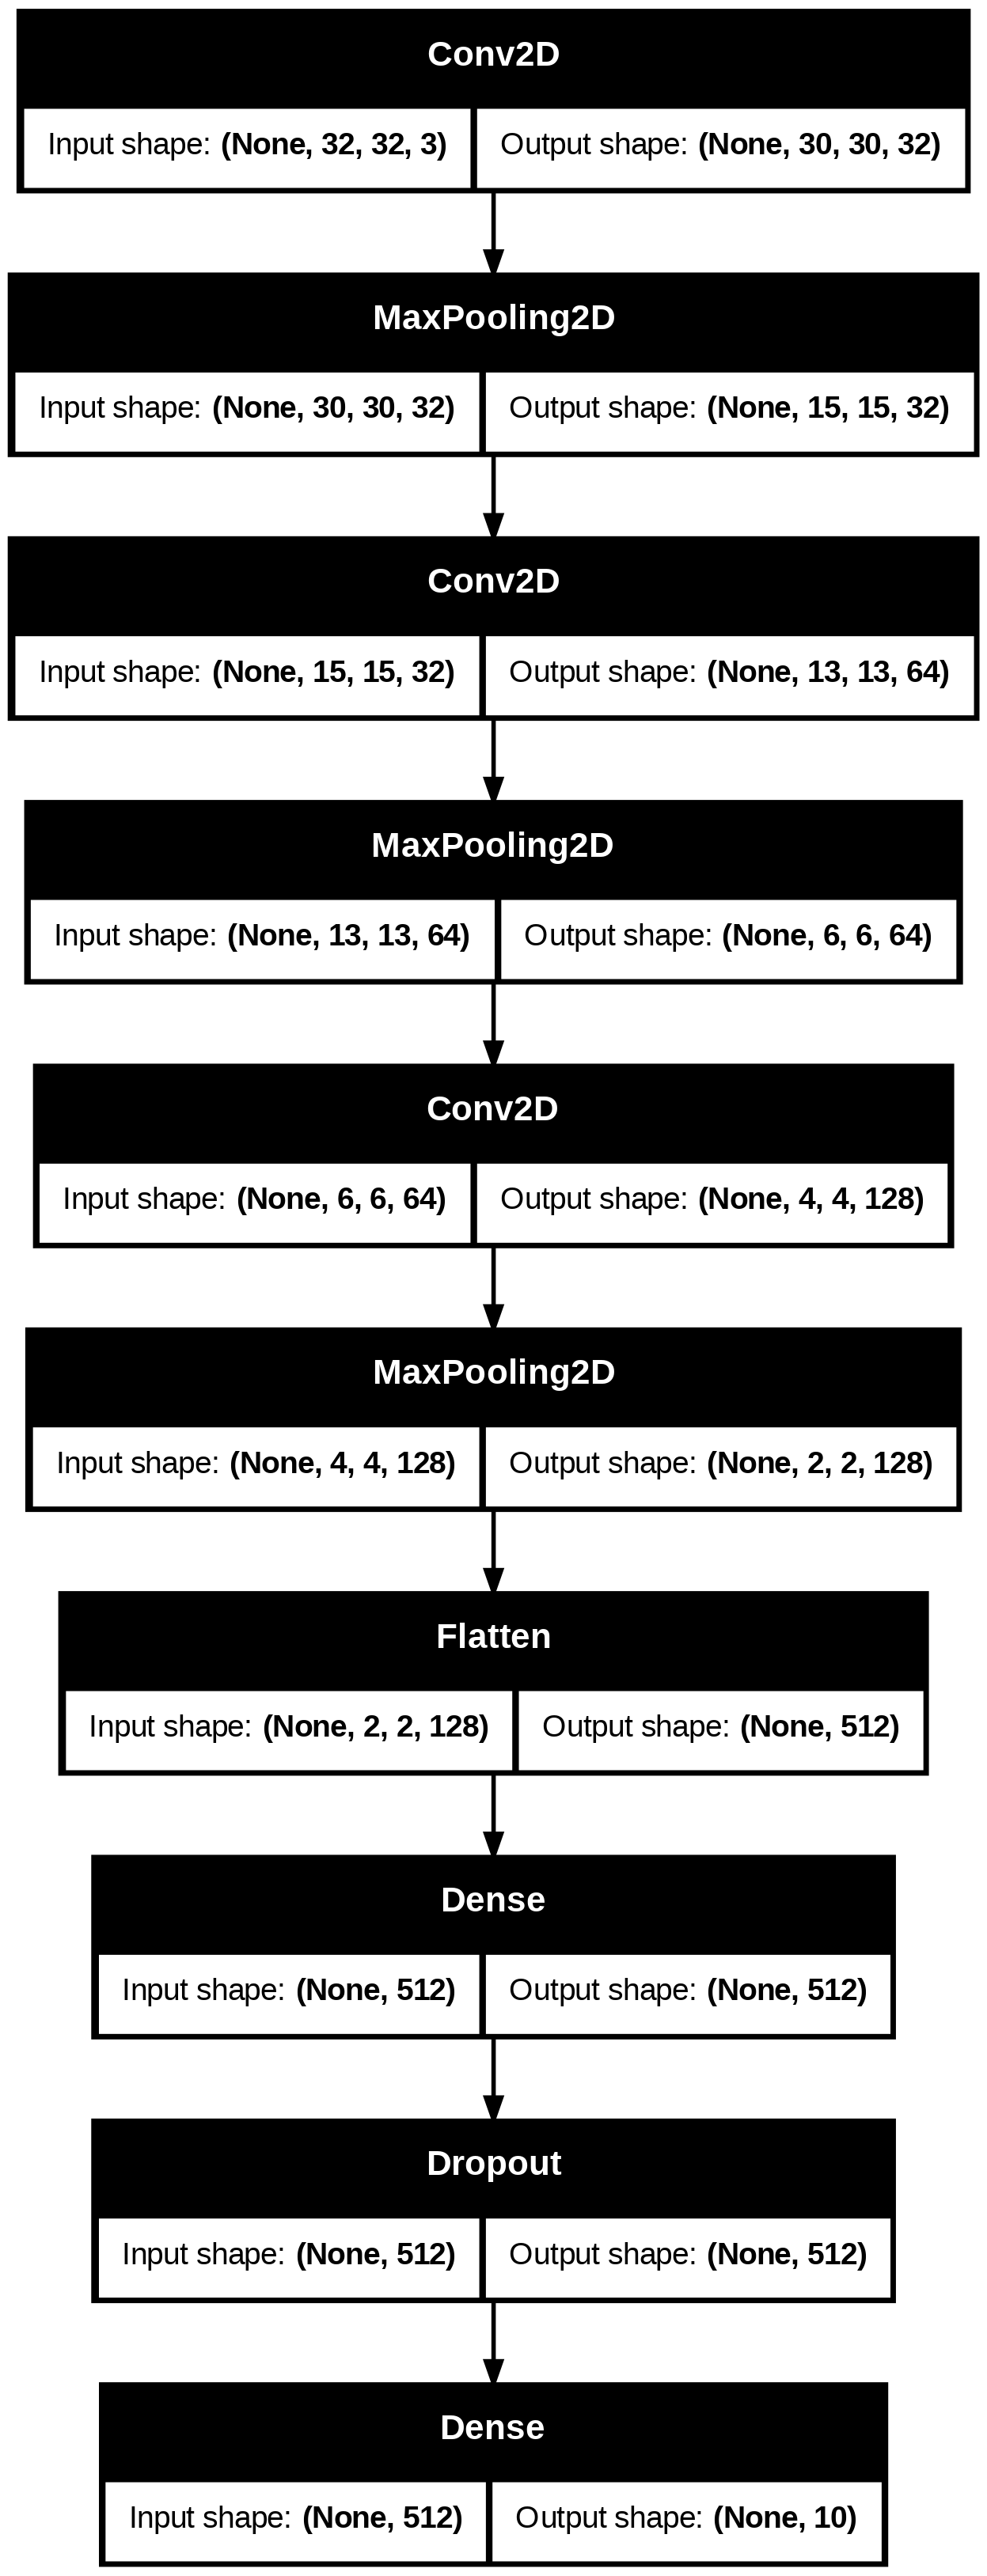

In [23]:
from keras.utils import plot_model
plot_model(model, show_shapes = True)